Raw Image info: (558, 961, 3)
Raw Image datatype: uint8


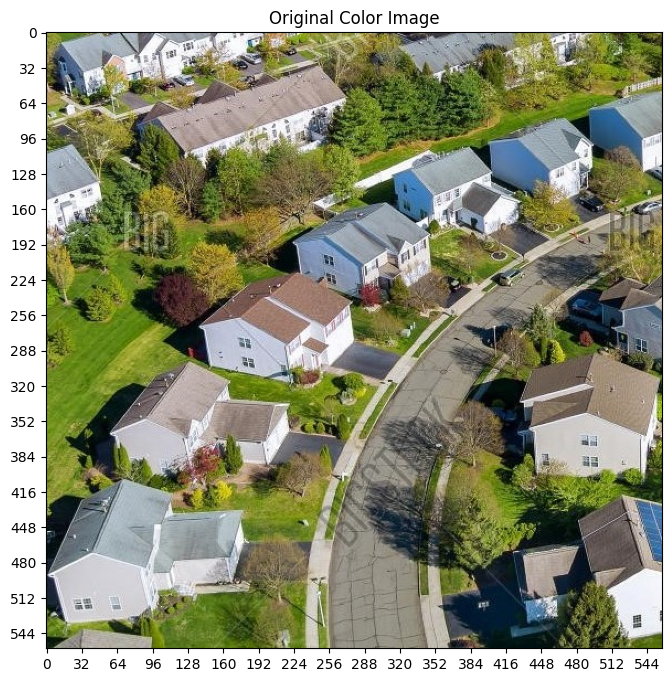

In [16]:
# display image
from PIL import Image
import matplotlib.style as style
import numpy as np
import matplotlib.pyplot as plt

style.use('default')

# Load the image and get its dimensions
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y, _ = image_raw.shape
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Crop and scale the image if needed (keeping original color)
cropped_image = image_raw[:image_crop_size, :image_crop_size]

# Normalize the image to float32 and scale to [0, 1] range for display
normalized_image = cropped_image.astype(np.float32) / 255.0

# Display the image
plt.figure(figsize=(8, 8))
plt.title('Original Color Image')
plt.xticks(range(0, image_crop_size+1, 32))
plt.yticks(range(0, image_crop_size+1, 32))
plt.imshow(normalized_image)
plt.axis('on')
plt.show()

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8


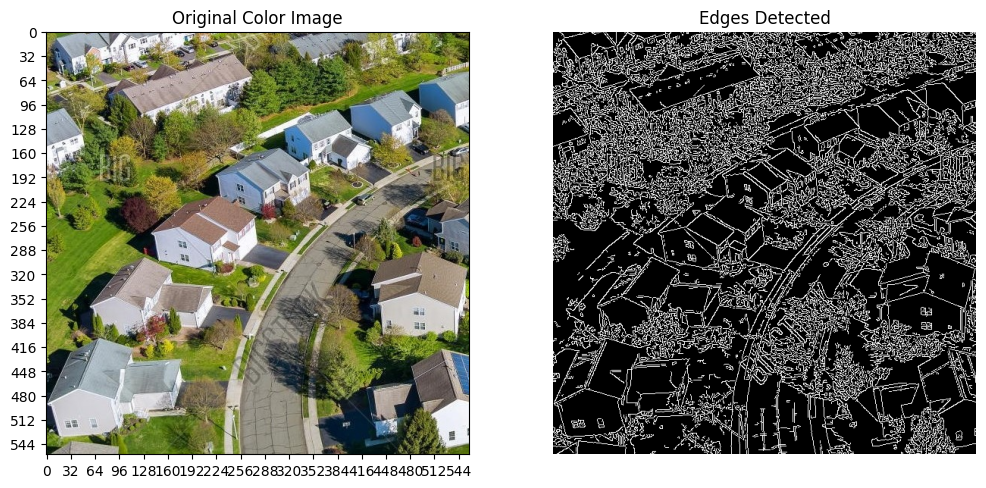

In [15]:
# detect edges
from PIL import Image
import matplotlib.style as style
import numpy as np
import matplotlib.pyplot as plt
import cv2

style.use('default')

# Load the image and get its dimensions
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y, _ = image_raw.shape
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Crop the image while keeping the original color
cropped_image = image_raw[:image_crop_size, :image_crop_size]

# Convert the cropped image to grayscale
image_gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(image_gray, 100, 200)

# Normalize edges for display (0 to 1 range)
edges_normalized = edges.astype(np.float32) / 255.0

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

# Display the original color image
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.xticks(range(0, image_crop_size+1, 32))
plt.yticks(range(0, image_crop_size+1, 32))
plt.imshow(cropped_image)
plt.axis('on')

# Display the edge-detected image
plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.xticks([])
plt.yticks([])
plt.imshow(edges_normalized, cmap='gray')
plt.axis('off')

plt.show()

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8
Image shape (numpy array): (558, 558)


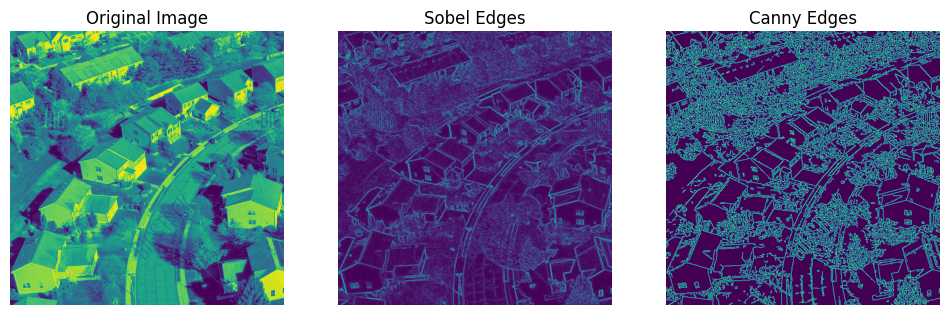

In [4]:
# colored image to grayscale

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Convert the RGB component of the image to B&W image, as a numpy (float32) array
image = []
for i in range(image_crop_size):
    image.append([])
    for j in range(image_crop_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)

# Normalize the image for edge detection
image_normalized = (image * 255).astype(np.uint8)

# Apply Sobel edge detection
sobelx = cv2.Sobel(image_normalized, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_normalized, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobelx**2 + sobely**2)

# Apply Canny edge detection
canny_edges = cv2.Canny(image_normalized, 100, 200)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sobel Edges')
plt.imshow(sobel_edges)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edges')
plt.imshow(canny_edges)
plt.axis('off')

plt.show()

In [17]:
# from 2D to 1D array
flattened_image = image.flatten()

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8
Image shape (numpy array): (558, 558)
      ┌────────────┐
 q_0: ┤ Ry(3.1376) ├
      ├────────────┤
 q_1: ┤ Ry(3.1376) ├
      ├────────────┤
 q_2: ┤ Ry(3.1375) ├
      ├────────────┤
 q_3: ┤ Ry(3.1374) ├
      ├────────────┤
 q_4: ┤ Ry(3.1375) ├
      ├────────────┤
 q_5: ┤ Ry(3.1377) ├
      ├────────────┤
 q_6: ┤ Ry(3.1379) ├
      ├────────────┤
 q_7: ┤ Ry(3.1379) ├
      ├────────────┤
 q_8: ┤ Ry(3.1385) ├
      ├────────────┤
 q_9: ┤ Ry(3.1384) ├
      ├────────────┤
q_10: ┤ Ry(3.1387) ├
      ├────────────┤
q_11: ┤ Ry(3.1388) ├
      ├───────────┬┘
q_12: ┤ Ry(3.139) ├─
      ├───────────┴┐
q_13: ┤ Ry(3.1391) ├
      ├────────────┤
q_14: ┤ Ry(3.1393) ├
      ├────────────┤
q_15: ┤ Ry(3.1392) ├
      ├────────────┤
q_16: ┤ Ry(3.1391) ├
      ├────────────┤
q_17: ┤ Ry(3.1392) ├
      └────────────┘
State Vector: Statevector([3.62409200e-51+0.j, 1.82221524e-48+0.j, 1.81030528e-48+0.j,
             ..., 2.00187399e-03+0.j, 1.98

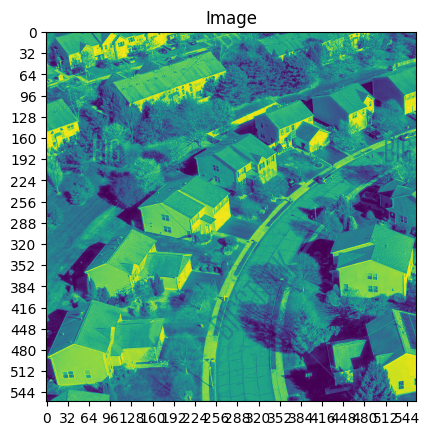

In [18]:
# Using FRQI for encoding image info into quantum stats.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import RYGate

# Load and preprocess the image
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Convert the RGB component of the image to B&W image, as a numpy (float32) array
image = []
for i in range(image_crop_size):
    image.append([])
    for j in range(image_crop_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)

# Flatten the image array
flattened_image = image.flatten()

def encode_image_into_quantum_state(image_data):
    num_pixels = image_data.size
    num_qubits = int(np.log2(num_pixels))
    
    # Create a quantum circuit with the necessary number of qubits
    qc = QuantumCircuit(num_qubits)
    
    # Prepare the quantum state with amplitude encoding
    norm_factor = np.linalg.norm(image_data)
    image_data_normalized = image_data / norm_factor
    
    for i in range(num_qubits):
        if i < len(image_data_normalized):  # Ensure index is within range
            theta = 2 * np.arccos(image_data_normalized[i])
            qc.append(RYGate(theta), [i])
    
    return qc

# Encode the flattened image data into a quantum state
qc = encode_image_into_quantum_state(flattened_image)

# Visualize the quantum circuit
print(qc.draw())

# Use a simulator to execute the quantum circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()

# Get the state vector
statevector = result.get_statevector()
print('State Vector:', statevector)

# Display the image
plt.title('Image')
plt.xticks(range(0, image.shape[1]+1, 32))
plt.yticks(range(0, image.shape[0]+1, 32))
plt.imshow(image, origin='upper')
plt.show()

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8
Number of objects detected: 121
Object Sizes (in pixels):
Object 1: 2992 pixels
Object 2: 1402 pixels
Object 3: 34 pixels
Object 4: 11 pixels
Object 5: 2800 pixels
Object 6: 25 pixels
Object 7: 1412 pixels
Object 8: 20 pixels
Object 9: 403 pixels
Object 10: 21 pixels
Object 11: 71 pixels
Object 12: 10 pixels
Object 13: 246 pixels
Object 14: 69 pixels
Object 15: 132 pixels
Object 16: 11 pixels
Object 17: 44 pixels
Object 18: 64 pixels
Object 19: 89 pixels
Object 20: 186 pixels
Object 21: 34 pixels
Object 22: 65 pixels
Object 23: 23 pixels
Object 24: 43 pixels
Object 25: 60 pixels
Object 26: 330 pixels
Object 27: 6 pixels
Object 28: 54 pixels
Object 29: 290 pixels
Object 30: 15 pixels
Object 31: 15167 pixels
Object 32: 45 pixels
Object 33: 152 pixels
Object 34: 247 pixels
Object 35: 131 pixels
Object 36: 44 pixels
Object 37: 18 pixels
Object 38: 9 pixels
Object 39: 2595 pixels
Object 40: 5 pixels
Object 41: 31 pixels
Object 42: 13 p

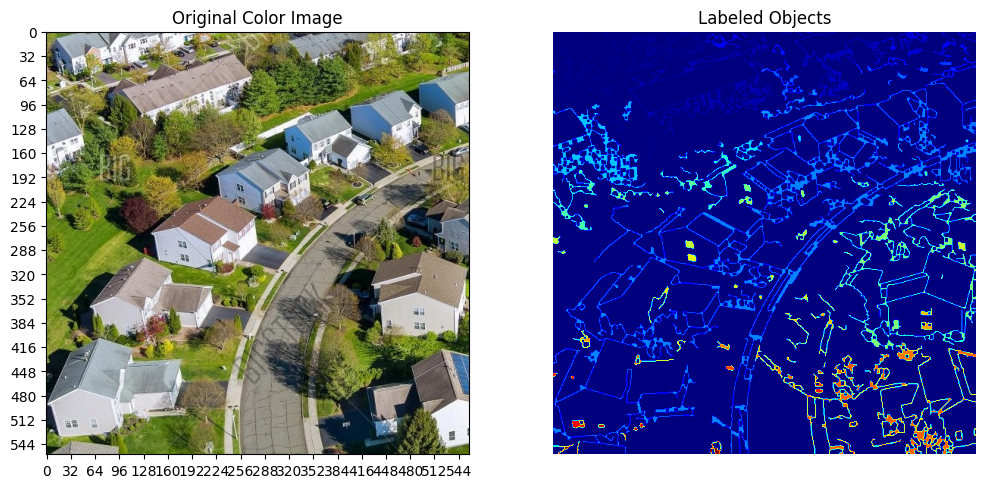

In [25]:
from PIL import Image
import matplotlib.style as style
import numpy as np
import matplotlib.pyplot as plt
import cv2

style.use('default')

# Load the image and get its dimensions
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y, _ = image_raw.shape
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Crop the image while keeping the original color
cropped_image = image_raw[:image_crop_size, :image_crop_size]

# Convert the cropped image to grayscale
image_gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Apply morphological operations to close gaps in edges
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
closed_edges = cv2.erode(dilated_edges, kernel, iterations=1)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed_edges)

# Display the number of objects
print(f'Number of objects detected: {num_labels - 1}')  # Subtract 1 to exclude the background

# Print object sizes
print("Object Sizes (in pixels):")
for i in range(1, num_labels):  # Skip background label 0
    print(f"Object {i}: {stats[i, cv2.CC_STAT_AREA]} pixels")

# Display the original and edge-detected images with objects highlighted
plt.figure(figsize=(12, 6))

# Display the original color image
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.xticks(range(0, image_crop_size+1, 32))
plt.yticks(range(0, image_crop_size+1, 32))
plt.imshow(cropped_image)
plt.axis('on')

# Display the edges with labels
plt.subplot(1, 2, 2)
plt.title('Labeled Objects')
plt.xticks([])
plt.yticks([])
plt.imshow(labels, cmap='jet')  # Use 'jet' colormap to highlight different objects
plt.axis('off')

plt.show()

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8


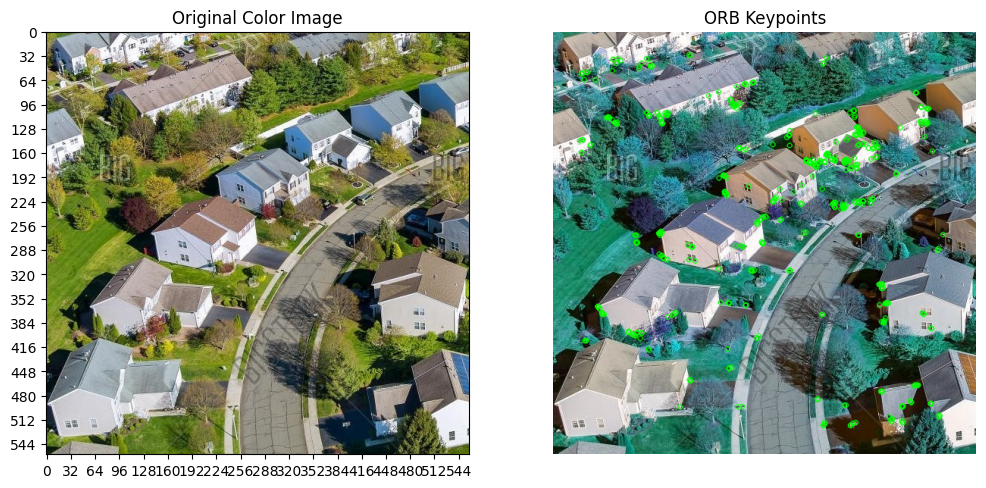

Number of Keypoints detected: 500


In [21]:
from PIL import Image
import matplotlib.style as style
import numpy as np
import matplotlib.pyplot as plt
import cv2

style.use('default')

# Load the image and get its dimensions
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y, _ = image_raw.shape
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Crop the image while keeping the original color
cropped_image = image_raw[:image_crop_size, :image_crop_size]

# Convert the cropped image to grayscale
image_gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Create ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image_gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(cropped_image, keypoints, None, color=(0, 255, 0))

# Display the results
plt.figure(figsize=(12, 6))

# Display the original color image
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.xticks(range(0, image_crop_size+1, 32))
plt.yticks(range(0, image_crop_size+1, 32))
plt.imshow(cropped_image)
plt.axis('on')

# Display the image with keypoints
plt.subplot(1, 2, 2)
plt.title('ORB Keypoints')
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

print(f'Number of Keypoints detected: {len(keypoints)}')

Raw Image info: (558, 961, 3)
Raw Image datatype: uint8


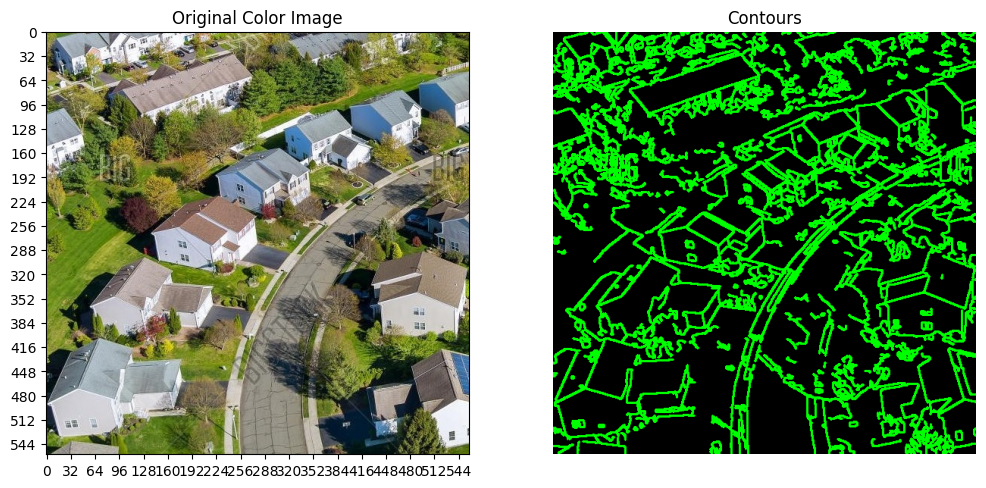

Number of contours detected: 578


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y, _ = image_raw.shape
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Crop the image while keeping the original color
cropped_image = image_raw[:image_crop_size, :image_crop_size]

# Convert the cropped image to grayscale
image_gray = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours
contour_image = np.zeros_like(cropped_image)

# Draw all contours on the blank image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color and thickness 2

# Display the original and contour-detected images
plt.figure(figsize=(12, 6))

# Display the original color image
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.xticks(range(0, image_crop_size+1, 32))
plt.yticks(range(0, image_crop_size+1, 32))
plt.imshow(cropped_image)
plt.axis('on')

# Display the contours
plt.subplot(1, 2, 2)
plt.title('Contours')
plt.xticks([])
plt.yticks([])
plt.imshow(contour_image)
plt.axis('off')

plt.show()

# Print the number of contours found
print(f'Number of contours detected: {len(contours)}')

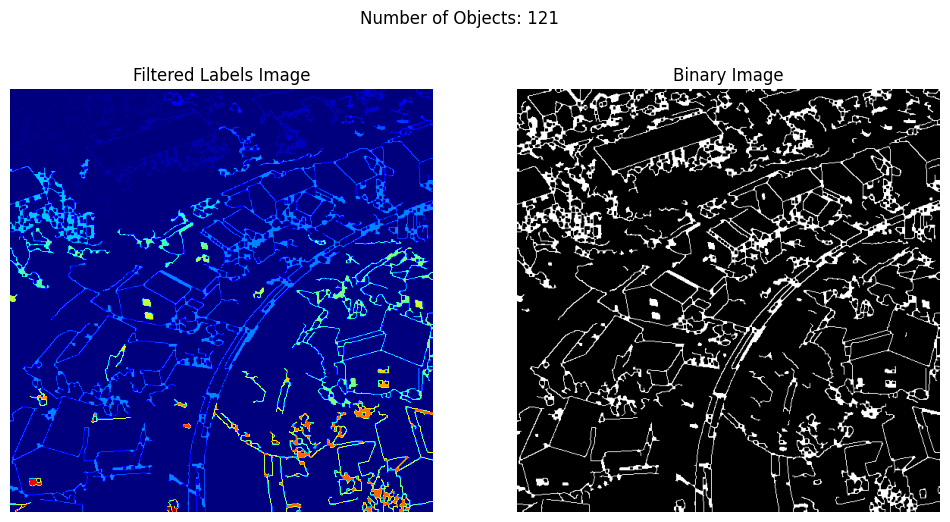

Number of Objects: 121


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_raw = np.array(Image.open('D:/6m_NIC/images/aerialImage.jpg'))
image_size_x, image_size_y = image_raw.shape[0], image_raw.shape[1]

# Adjust cropping size to fit within image dimensions
image_crop_size = min(image_size_x, image_size_y)

# Convert the RGB component of the image to B&W image
image_gray = cv2.cvtColor(image_raw[:image_crop_size, :image_crop_size], cv2.COLOR_RGB2GRAY)

# Normalize the image for edge detection
image_normalized = (image_gray).astype(np.uint8)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image_normalized, (5, 5), 0)

# Apply Canny edge detection
canny_edges = cv2.Canny(blurred, 100, 200)

# Convert the Canny edges to a binary image
_, binary_image = cv2.threshold(canny_edges, 1, 255, cv2.THRESH_BINARY)

# Apply morphological operations to close gaps in edges
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(binary_image, kernel, iterations=1)
closed_edges = cv2.erode(dilated_edges, kernel, iterations=1)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed_edges)

# Filter out small objects
min_size = 50  # Minimum size to keep
filtered_labels = np.zeros_like(labels)
for i in range(1, num_labels):  # Skip background label 0
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_labels[labels == i] = i

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Filtered Labels Image')
plt.imshow(filtered_labels, cmap='jet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image')
plt.imshow(closed_edges, cmap='gray')
plt.axis('off')

plt.suptitle(f'Number of Objects: {np.max(filtered_labels)}')  # Number of objects based on the highest label value

plt.show()

print('Number of Objects:', np.max(filtered_labels))  # Count the number of unique labels
